# Bagging, Random Forest and Boosting
- [Bagging and Random Forest](#BGARF)
- [Gradient Boosting](#GB)
- [Appendix](#APPENDIX)

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [24]:
def bag(X, y):
    n_samples = X.shape[0]
    indices = np.random.choice(n_samples, size=n_samples, replace=True)
    return X[indices], y[indices]

def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

## <a id="BGARF"></a>Bagging and Random Forest

In [26]:
class RandomForest:
    def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, max_features=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []
    
    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(min_samples_split=self.min_samples_split, max_depth=self.max_depth, max_features=self.max_features)
            X_sample, y_sample = bag(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
    
    def predict(self, X):
        tree_predict = np.array([tree.predict(X) for tree in self.trees])
        tree_predict = np.swapaxes(tree_predict, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_predict]
        return np.array(y_pred)

In [27]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = RandomForest(n_trees=10, max_depth=10, max_features='sqrt')

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy(y_test, y_pred)

print("Accuracy: ", acc)

Accuracy:  0.956140350877193


## <a id="GB"></a>Gradient Boosting

In [33]:
def GradBoost(model, X_train, y_train, X_test, boosting_rounds, learning_rate=0.1):
    y_hat_train = np.repeat(np.mean(y_train), len(y_train))
    y_hat_test = np.repeat(np.mean(y_train), len(X_test))
    
    residuals = y_train - y_hat_train
    
    for i in range(boosting_rounds):
        model = model.fit(X_train, residuals)
        y_hat_train += learning_rate * model.predict(X_train)
        y_hat_test += learning_rate * model.predict(X_test)
        residuals = y_train - y_hat_train
    return y_hat_train, y_hat_test

In [30]:
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, n_targets=1, bias=0, noise=20, shuffle=True, random_state=13)

X_train = X[:800]
y_train = y[:800]

X_test = X[800:]
y_test = y[800:]

In [31]:
model = DecisionTreeRegressor(criterion='squared_error', max_depth=3)

In [35]:
mse_train = list()
n_rounds = np.arange(5, 101, 5)
for n_round in n_rounds:
    y_hat_train, _ = GradBoost(model, X_train, y_train, X_test, boosting_rounds=n_round, learning_rate=0.1)
    mse_train.append(np.mean((y_train - y_hat_train) ** 2))

**MSE vs No. of Rounds**

Text(0, 0.5, 'Mean Squared Error')

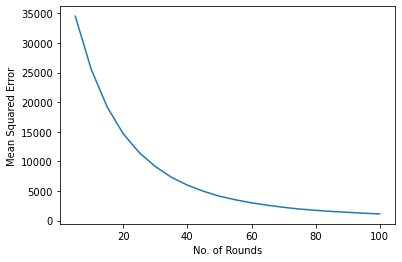

In [38]:
plt.plot(n_rounds, mse_train)
plt.xlabel("No. of Rounds")
plt.ylabel("Mean Squared Error")

**Predicted vs Actual for Different values of `n_rounds`** 

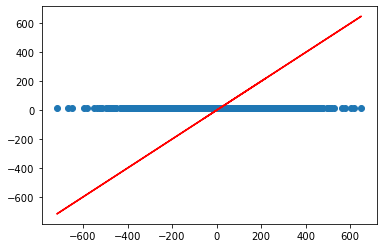

In [39]:
n_round = 0
y_hat_train, y_hat_test = GradBoost(model, X_train, y_train, X_test, boosting_rounds=n_round, learning_rate=0.1)
plt.scatter(y_train, y_hat_train) # Predicted
plt.plot(y_train, y_train, color='r') # Actual

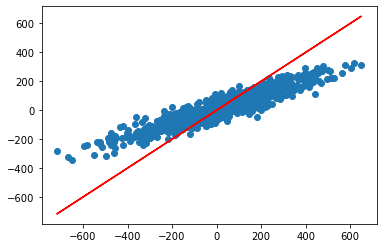

In [40]:
n_round = 20
y_hat_train, y_hat_test = GradBoost(model, X_train, y_train, X_test, boosting_rounds=n_round, learning_rate=0.1)
plt.scatter(y_train, y_hat_train) # Predicted
plt.plot(y_train, y_train, color='r') # Actual

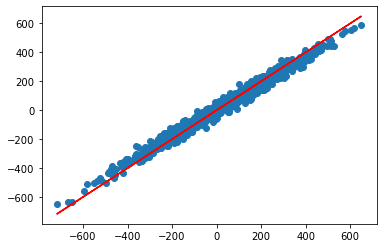

In [41]:
n_round = 100
y_hat_train, y_hat_test = GradBoost(model, X_train, y_train, X_test, boosting_rounds=n_round, learning_rate=0.1)
plt.scatter(y_train, y_hat_train) # Predicted
plt.plot(y_train, y_train, color='r') # Actual

# <a id="APPENDIX"></a>Appendix

### `np.random.choice()` : 

Generates a random sample from a given 1-D array.

In [15]:
# Generate a uniform random sample from np.arange(5) of size 3:
print(np.random.choice(5, 3))

# Generate a non-uniform random sample from np.arange(5) of size 3:
print(np.random.choice(5, 3, p=[0.1, 0, 0.3, 0.6, 0]))

# Generate a uniform random sample from np.arange(5) of size 3 without replacement:
print(np.random.choice(5, 3, replace=False))

[0 3 3]
[0 3 3]
[1 3 4]


### `np.swapaxes()` :

Interchange two axes of an array.

In [21]:
x = np.array([[1,2,3]])
print(np.swapaxes(x,0,1))

x = np.array([[[0,1],[2,3]],[[4,5],[6,7]]])
print("\n", np.swapaxes(x,0,2))

[[1]
 [2]
 [3]]

 [[[0 4]
  [2 6]]

 [[1 5]
  [3 7]]]
